# Prepare the data

In [115]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

## Data

In [12]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [62]:
len(train_set)

60000

In [63]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [64]:
train_set.targets.bincount() # how often a lable occures 

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

### Sample

In [65]:
sample = next(iter(train_set))
image, label = sample ## same as image = sample[0] label = sample[1]

label is 9


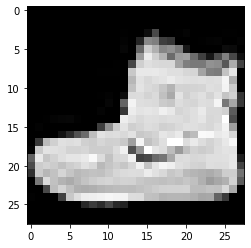

In [66]:
plt.imshow(image.squeeze(), cmap='gray')
print(f"label is {label}")

### Batch sample

In [67]:
train_loader = torch.utils.data.DataLoader(train_set
                                           ,batch_size=10
                                           ,shuffle=True
                                          )
batch = next(iter(train_loader)) # list 
images, labels = batch

In [68]:
images.shape

torch.Size([10, 1, 28, 28])

lables: tensor([3, 0, 3, 8, 6, 0, 0, 5, 6, 7])


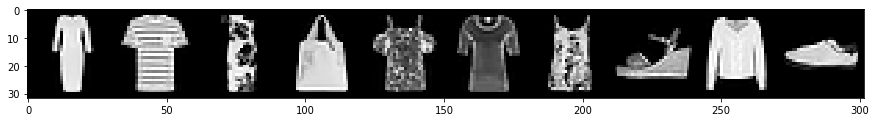

In [69]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print(f"lables: {labels}")

## CNN Architecture
stride = Schritt

In [136]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        #The words kernal and filter are interchangeable
        self.conv1=nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) 
        self.conv2=nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1=nn.Linear(in_features= 12*4*4, out_features=120)
        self.fc2=nn.Linear(in_features= 120, out_features=60)
        self.out=nn.Linear(in_features= 60, out_features=10)
        #print(f"create: {self}")
        
    def forward(self, t):
        # (1) input layer
        t = t
        
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)
        
        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)
        
        return t

In [137]:
network = Network()
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [97]:
print(type(network.conv1.weight))
network.conv1.weight

<class 'torch.nn.parameter.Parameter'>


Parameter containing:
tensor([[[[ 0.0593, -0.1991, -0.0446,  0.0023,  0.0469],
          [ 0.1769, -0.1049,  0.0829, -0.0243,  0.1894],
          [-0.1145, -0.0902, -0.0379, -0.0443, -0.1614],
          [ 0.1235,  0.1033,  0.0201, -0.1107,  0.0795],
          [ 0.0984,  0.1751,  0.0916, -0.0258,  0.0190]]],


        [[[-0.0046,  0.1211, -0.1062, -0.0679,  0.0969],
          [-0.1454, -0.0939, -0.0250,  0.1224, -0.1028],
          [-0.0483,  0.1216, -0.0237, -0.0708,  0.0393],
          [-0.0886,  0.0403,  0.1407,  0.0658,  0.0423],
          [-0.0072, -0.1742, -0.1229,  0.1442, -0.0752]]],


        [[[-0.0904, -0.0226,  0.0732,  0.1199, -0.1700],
          [ 0.1029,  0.1555,  0.1994, -0.1220, -0.1513],
          [ 0.0709,  0.1511, -0.0494, -0.1720, -0.0264],
          [ 0.0029, -0.1087,  0.0560,  0.1911,  0.1552],
          [-0.0875, -0.0425, -0.1860,  0.0604, -0.0116]]],


        [[[-0.0484,  0.1417, -0.0251,  0.0948,  0.0461],
          [ 0.0132,  0.1302,  0.1560, -0.1778,  0.0167

In [102]:
#print(network.conv1.weight.shape)
#print(network.conv2.weight.shape)
#print(network.fc1.weight.shape)
#print(network.fc2.weight.shape)
#print(network.out.weight.shape)

for name, param in network.named_parameters(): # network.parameters() also possible
    print(f"{name} \t {param.shape}")


conv1.weight 	 torch.Size([6, 1, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([12, 6, 5, 5])
conv2.bias 	 torch.Size([12])
fc1.weight 	 torch.Size([120, 192])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([60, 120])
fc2.bias 	 torch.Size([60])
out.weight 	 torch.Size([10, 60])
out.bias 	 torch.Size([10])


### computation graph

The computation graph keeps track of the network's mapping by tracking each computation that happens. The graph is used during the training process to calculate the derivative (gradient) of the loss function with respect to the network’s weights.

The following reduces memory consumption since the graph isn't stored in memory.

In [117]:
torch.set_grad_enabled(True) # torch.set_grad_enabled(False)

## Training

1. Get batch from the training set.
2. Pass batch to network.
3. Calculate the loss (difference between the predicted values and the true values)
4. Calculate the gradient of the loss function w.r.t the network's weights
5. Update the weights using the gradients to reduce the loss.
6. Repeat steps 1-5 until one epoch is completed.
7. Repeat steps 1-6 for as many epochs required to obtain the desired level of accuracy.


network.parameter = > weights

In [132]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
batch = next(iter(train_loader))
images, labels = batch
images.shape

torch.Size([100, 1, 28, 28])

In [134]:
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item()

2.291659355163574

### example

##### single Batch

In [156]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)


optimizer = optim.Adam(network.parameters(),lr=0.02)

batch = next(iter(train_loader))
images, labels = batch

preds = network(images)
loss = F.cross_entropy(preds, labels)

loss.backward()
optimizer.step()

print(f"loss1: {loss.item()}")
preds = network(images)
loss = F.cross_entropy(preds, labels)
print(f"loss2: {loss.item()}")


loss1: 2.305544853210449
loss2: 2.266180992126465


##### epoch

In [167]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [174]:
%%time
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(),lr=0.01)

for epoch in range(1):
    total_loss = 0
    total_correct = 0

    for batch in train_loader:
        images, labels = batch
        preds = network(images)
        loss = F.cross_entropy(preds, labels)

        optimizer.zero_grad()
        loss.backward() # calculates gradient
        optimizer.step() # update weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print(f"epoch: {epoch}, total_correc: {total_correct}, loss: {total_loss}")

epoch: 0, total_correc: 47189, loss: 341.3248451203108
CPU times: user 1min 52s, sys: 2.43 s, total: 1min 55s
Wall time: 17.8 s


In [176]:
%%time
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(),lr=0.01)

batch = next(iter(train_loader))


images, labels = batch

preds = network(images)
loss = F.cross_entropy(preds, labels)

optimizer.zero_grad()
loss.backward() # calculates gradient
optimizer.step() # update weights

total_loss += loss.item()
total_correct += get_num_correct(preds, labels)

<class 'list'>
CPU times: user 45.4 ms, sys: 3.64 ms, total: 49 ms
Wall time: 35.6 ms
